1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-retail business acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per 10,000 
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population 
14. TARGET: Median value of owner-occupied homes in $1000's


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')
import numpy as np

C:\Users\arthu\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = load_boston()

In [3]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target

In [4]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


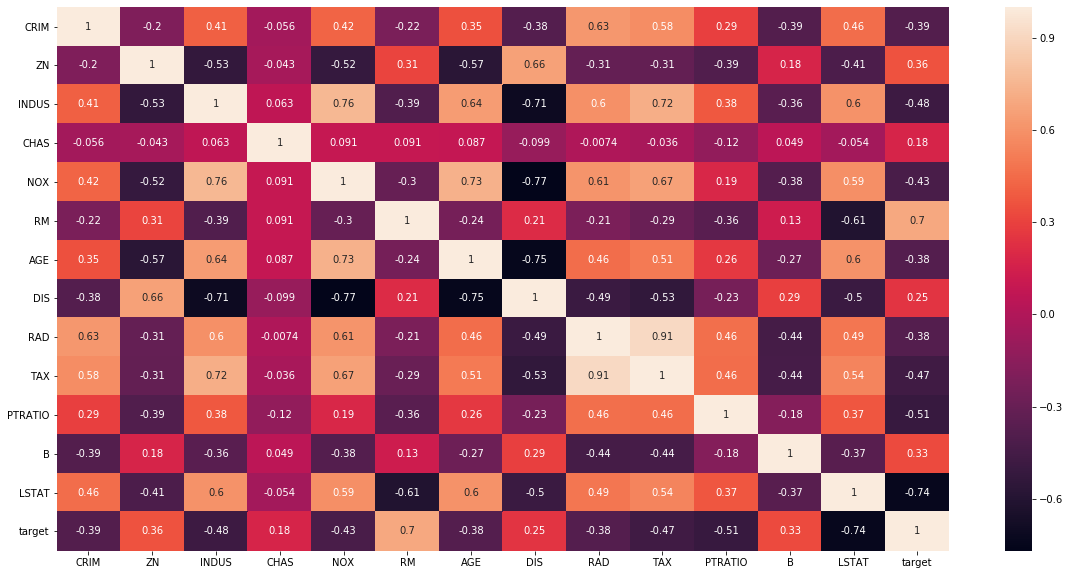

In [5]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr() , annot= True)

In [6]:
### First try with statsmodel
import statsmodels.api as sm

In [7]:
y, x = df['target'] , df[['LSTAT']]

In [8]:
x = sm.add_constant(x)

In [9]:
modelo = sm.OLS(y,x)

In [10]:
modelo_v1 = modelo.fit()

In [11]:
print(modelo_v1.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           5.08e-88
Time:                        23:43:44   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

Text(0, 0.5, 'target')

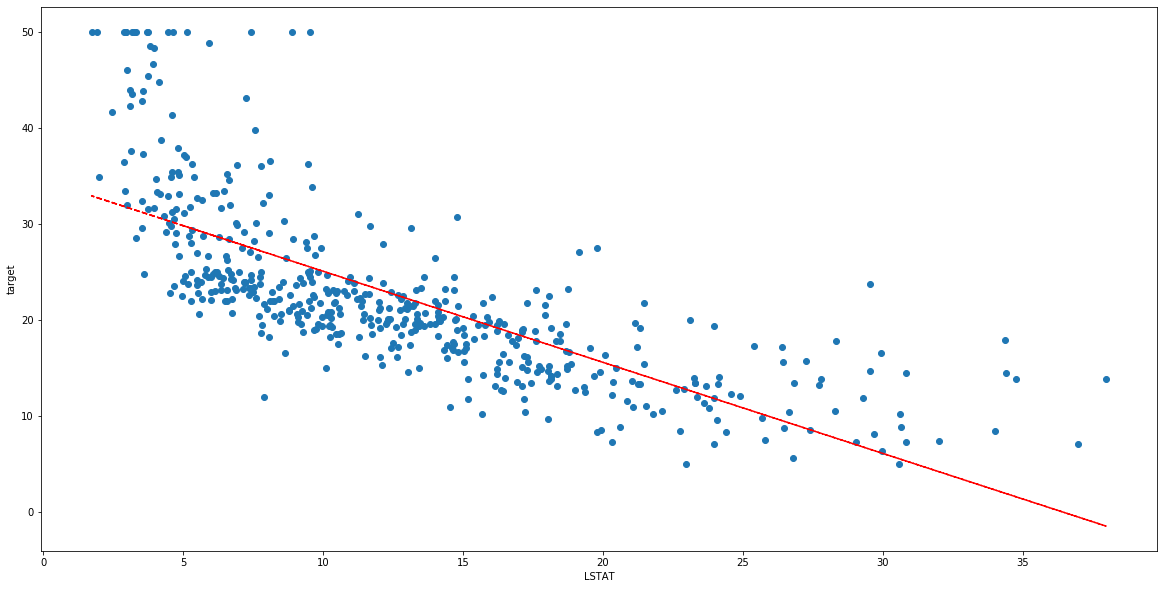

In [12]:
plt.figure(figsize=(20,10))
plt.scatter(x = df[['LSTAT']] , y = y) ## Real Values by LSTAT
plt.plot(df[['LSTAT']]  ,  modelo_v1.predict(x), "r--") ## Predicted Values by LSTAT
plt.xlabel('LSTAT')
plt.ylabel('target')

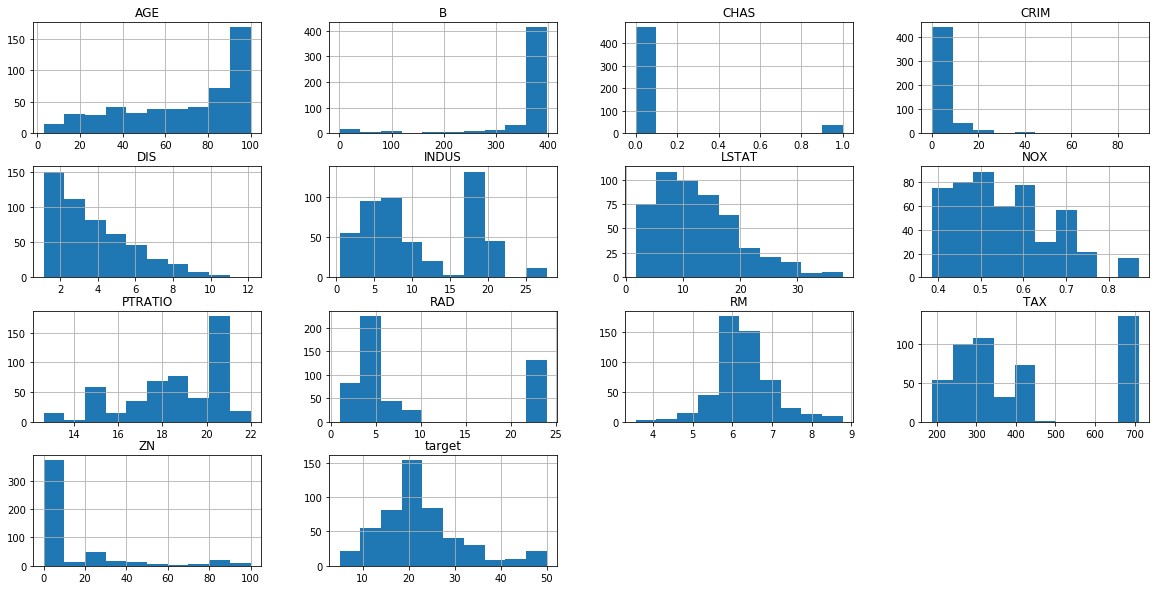

In [13]:
#plt.figure(figsize=(20,10))
df.hist(figsize=(20,10))
plt.show()

In [14]:
x2 = df[['LSTAT', 'RM' ,'PTRATIO', 'TAX']]
x2 = sm.add_constant(x2)
x2

,const,LSTAT,RM,PTRATIO,TAX
0,1.0,4.98,6.575,15.3,296.0
1,1.0,9.14,6.421,17.8,242.0
2,1.0,4.03,7.185,17.8,242.0
3,1.0,2.94,6.998,18.7,222.0
4,1.0,5.33,7.147,18.7,222.0
...,...,...,...,...,...
501,1.0,9.67,6.593,21.0,273.0
502,1.0,9.08,6.120,21.0,273.0
503,1.0,5.64,6.976,21.0,273.0
504,1.0,6.48,6.794,21.0,273.0


In [15]:
modelo2 = sm.OLS(y, x2)

In [16]:
modelo_v2 = modelo2.fit()

In [17]:
print(modelo_v2.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     265.7
Date:                Tue, 24 Aug 2021   Prob (F-statistic):          2.45e-122
Time:                        23:43:52   Log-Likelihood:                -1552.2
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     501   BIC:                             3136.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.6745      3.973      4.449      0.0

[]

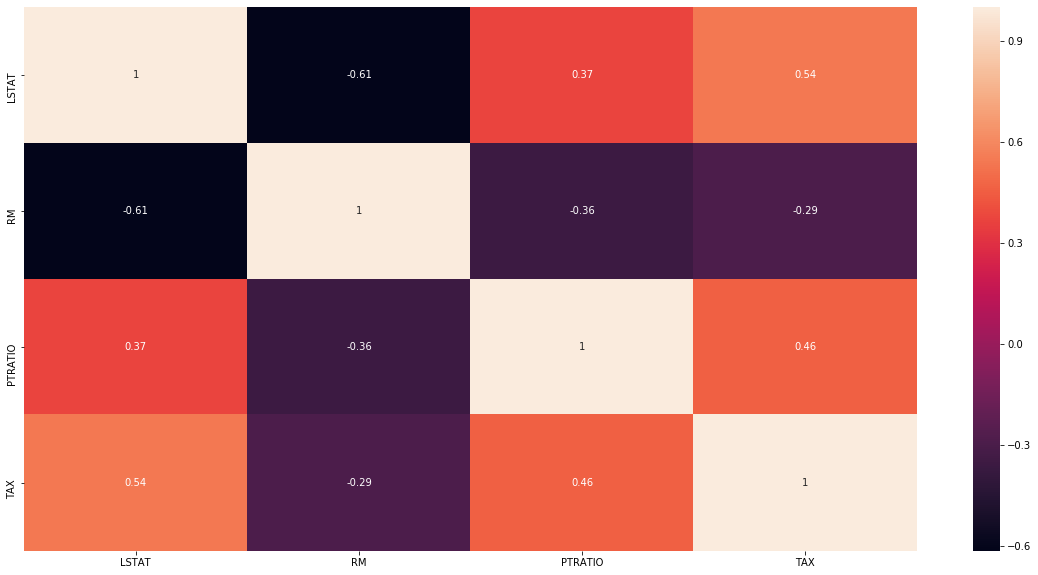

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(df[['LSTAT', 'RM' ,'PTRATIO', 'TAX']].corr() , annot= True) 
plt.plot()

In [19]:
####### sklearnfrom 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [20]:
##Criando o modelo
modelo3 = LinearRegression(normalize = False, fit_intercept = True)

In [21]:
x3_train , x3_test , y_train , y_test = train_test_split(df.iloc[:,:-1]  , y , test_size = 0.2   )

In [22]:
modelo3.fit(x3_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
r2_score(y_test , modelo3.predict(x3_test))

0.6072195889960255

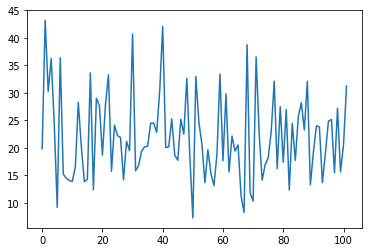

In [31]:
plt.plot(modelo3.predict(x3_test) )